In [21]:
import os

if os.path.isdir('data'):
   os.mkdir('data')
   os.chdir('data')

In [2]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz', 'housing.tgz')
    

('housing.tgz', <http.client.HTTPMessage at 0x7fc25866b198>)

In [3]:
import tarfile
import gzip
import shutil
tar = tarfile.open('housing.tgz')
tar.extractall()

with open('housing.csv', 'rb') as f_in:
    with gzip.open('housing.csv.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [4]:
import pandas as pd
df = pd.read_csv('housing.csv.gz')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df.ocean_proximity.describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

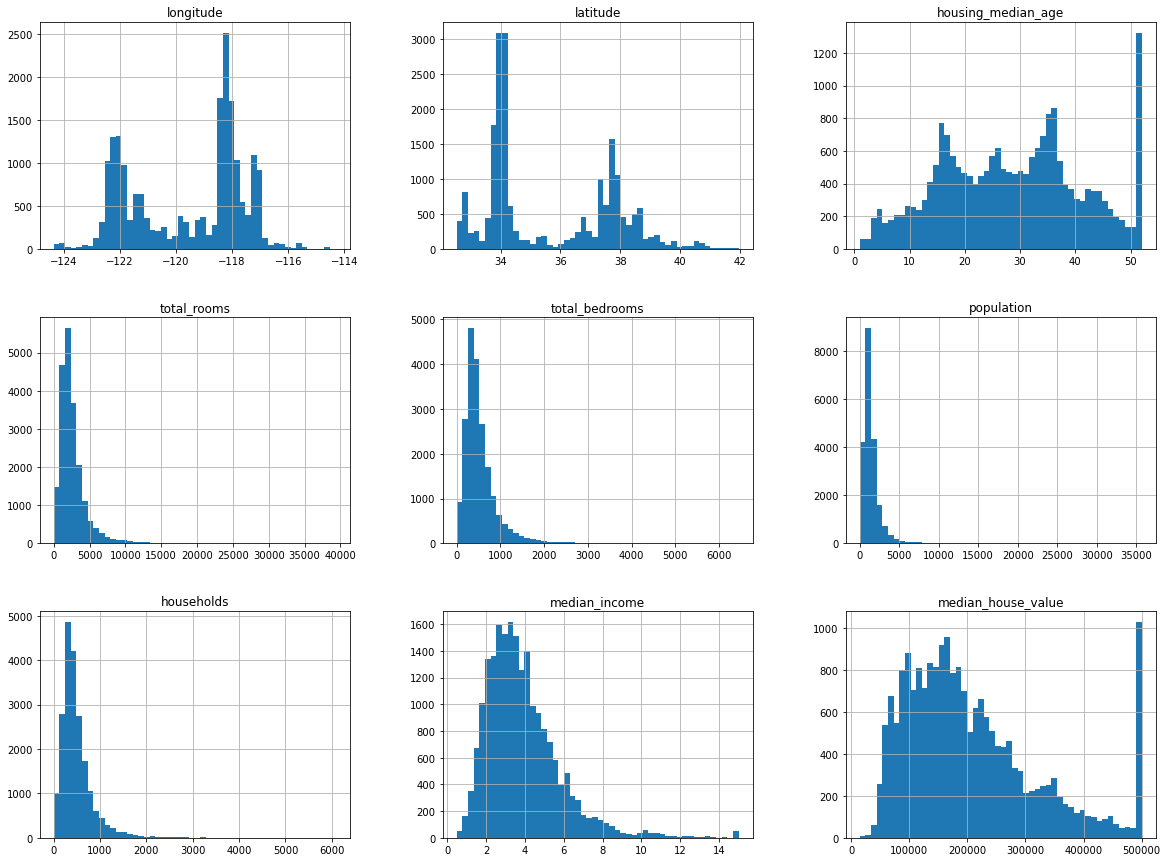

In [9]:
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15))
plt.savefig('obraz1.png')

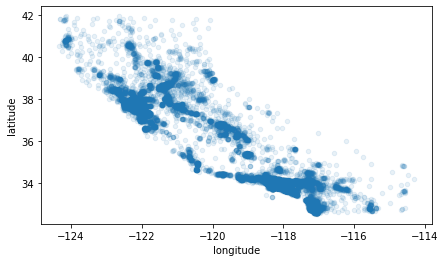

In [10]:
df.plot(kind="scatter", x="longitude", y="latitude",
        alpha=0.1, figsize=(7,4))
plt.savefig('obraz2.png')

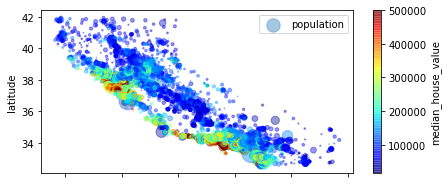

In [11]:
   # potrzebne ze względu na argument cmap
df.plot(kind="scatter", x="longitude", y="latitude",
        alpha=0.4, figsize=(7,3), colorbar=True,
        s=df["population"]/100, label="population", 
        c="median_house_value", cmap=plt.get_cmap("jet"))
plt.savefig('obraz3.png')

In [12]:
df.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [13]:
df.corr()["median_house_value"].sort_values(ascending=False).reset_index().rename(columns={"atrybut":"index", "wspolczynnik_korelacji":"median_house_value"}).to_csv('korelacja.csv', index=False)


In [15]:
import seaborn as sns
sns.pairplot(df)

ModuleNotFoundError: No module named 'seaborn'

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,
                                       test_size=0.2,
                                       random_state=42)
len(train_set),len(test_set)

(16512, 4128)

In [18]:
train_set.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


In [19]:
test_set.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925351,-0.134397,0.068286,0.096782,0.122507,0.079220,-0.006921,-0.044062
latitude,-0.925351,1.000000,0.035154,-0.063542,-0.095777,-0.134640,-0.098654,-0.093560,-0.149295
housing_median_age,-0.134397,0.035154,1.000000,-0.362596,-0.319843,-0.312528,-0.303429,-0.107897,0.113585
total_rooms,0.068286,-0.063542,-0.362596,1.000000,0.929952,0.854351,0.910780,0.197011,0.134697
total_bedrooms,0.096782,-0.095777,-0.319843,0.929952,1.000000,0.873576,0.977659,-0.002008,0.056667
population,0.122507,-0.134640,-0.312528,0.854351,0.873576,1.000000,0.906830,0.007684,-0.019003
households,0.079220,-0.098654,-0.303429,0.910780,0.977659,0.906830,1.000000,0.013940,0.074249
median_income,-0.006921,-0.093560,-0.107897,0.197011,-0.002008,0.007684,0.013940,1.000000,0.677502
median_house_value,-0.044062,-0.149295,0.113585,0.134697,0.056667,-0.019003,0.074249,0.677502,1.000000


In [20]:
import pickle

pickle.dump(train_set, open("train_set", "wb"))
pickle.dump(test_set, open("test_set", "wb"))